In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data and a always asking those 6 questions

In [ ]:
df = pd.read_csv('Dataset/yield_df.csv')
df.head()
# df.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


## Whenever the Output is Boolean we ofenly use classification problem
## But when we want a numerical value as output we use Regression

In [7]:
df.shape

(28242, 7)

In [8]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [11]:
df.duplicated().sum() # np.int64(2310)

np.int64(2310)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.dtypes

Area                              object
Item                              object
Year                               int64
hg/ha_yield                        int64
average_rain_fall_mm_per_year    float64
pesticides_tonnes                float64
avg_temp                         float64
dtype: object

In [14]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


In [16]:
df['average_rain_fall_mm_per_year'].value_counts()

average_rain_fall_mm_per_year
1083.0    3384
1761.0    1854
758.0     1280
534.0      966
494.0      966
          ... 
626.0       42
641.0       42
847.0       39
83.0        29
241.0       24
Name: count, Length: 100, dtype: int64

## Transforming Average_rain_fall_per_year

### In summary this code incadicates the indices of rows in the dataframe of where the value in the colomn 'average_rain_fall_per_year' are not numeric but Strings. These rows can be considered for removal of further processing depending on the specific use case.

In [19]:
def isstr(obj):
    try:
        float(obj)
        return False
    except:
        return True

# df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].apply(lambda x: x.replace(',', '') if isstr(x) else x)

In [22]:
to_drop = df[df['average_rain_fall_mm_per_year'].apply(isstr)].index

In [23]:
df = df.drop(to_drop)

In [28]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25932 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           25932 non-null  object 
 1   Item                           25932 non-null  object 
 2   Year                           25932 non-null  int64  
 3   hg/ha_yield                    25932 non-null  int64  
 4   average_rain_fall_mm_per_year  25932 non-null  float64
 5   pesticides_tonnes              25932 non-null  float64
 6   avg_temp                       25932 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.6+ MB


<Axes: xlabel='count', ylabel='Area'>

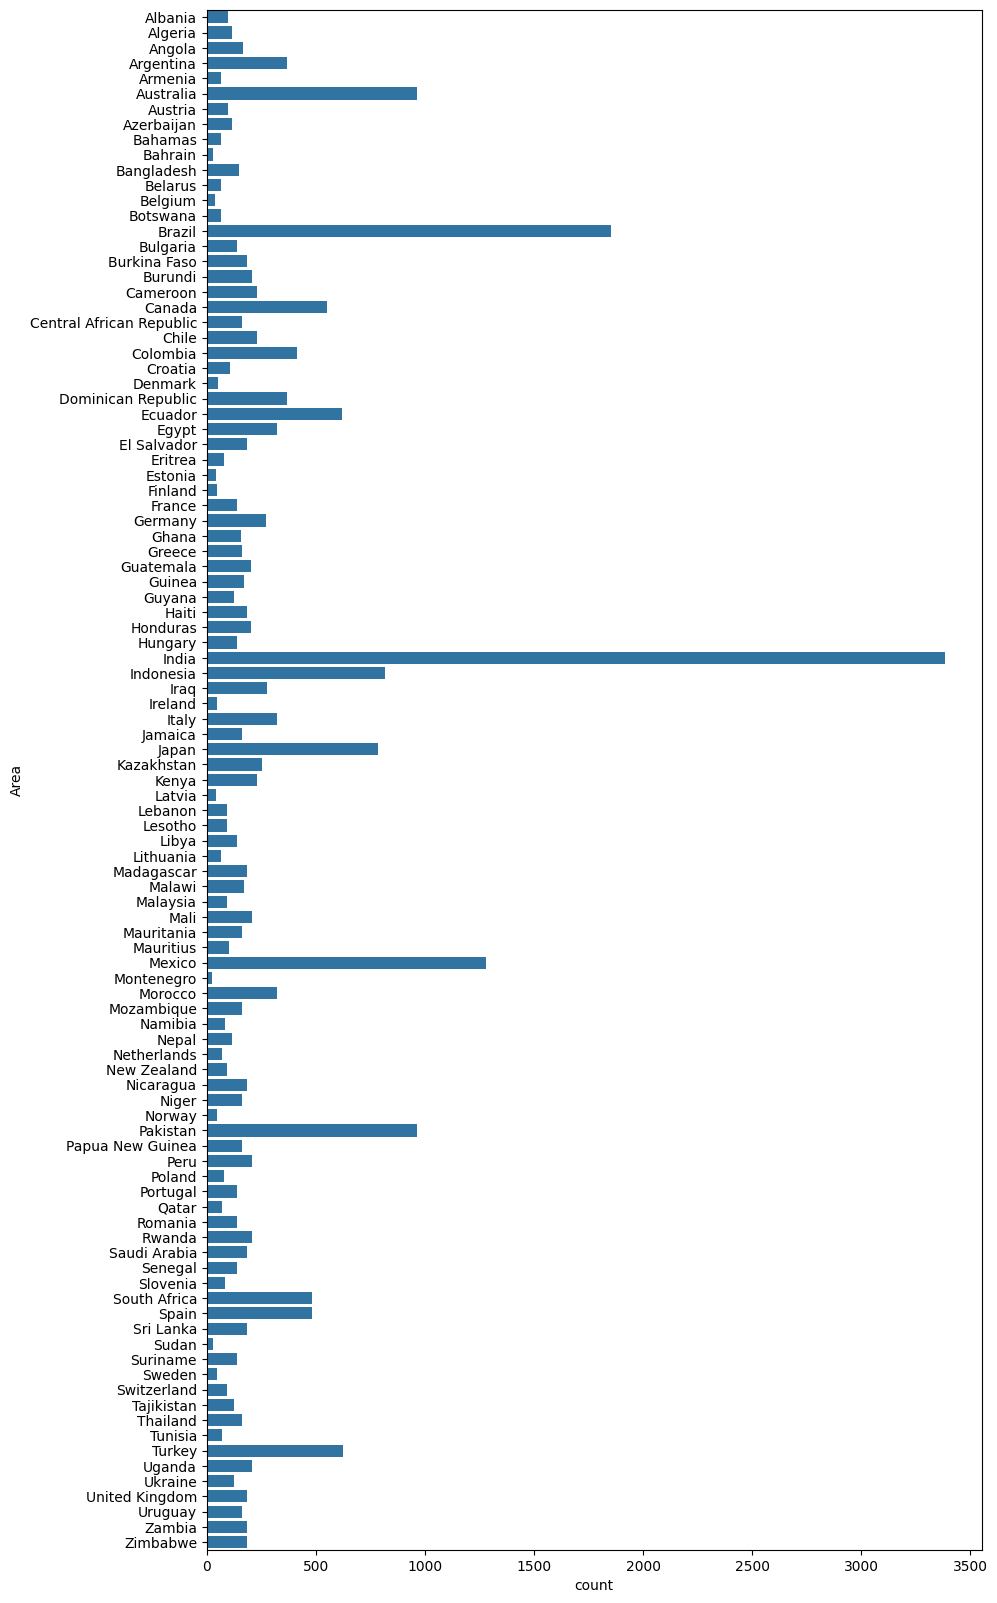

In [25]:
plt.figure(figsize=(10,20))  # 10 = Height and 20 = Width
sns.countplot(y=df['Area'])

## Yeild Per Country

In [35]:
country = df['Area'].unique()

In [39]:
yeild_per_country = []
for state in country:
    yeild_per_country.append(df[df['Area'] == state]['hg/ha_yield'].sum())

df['hg/ha_yield'].sum()

np.int64(1996196943)

<Axes: >

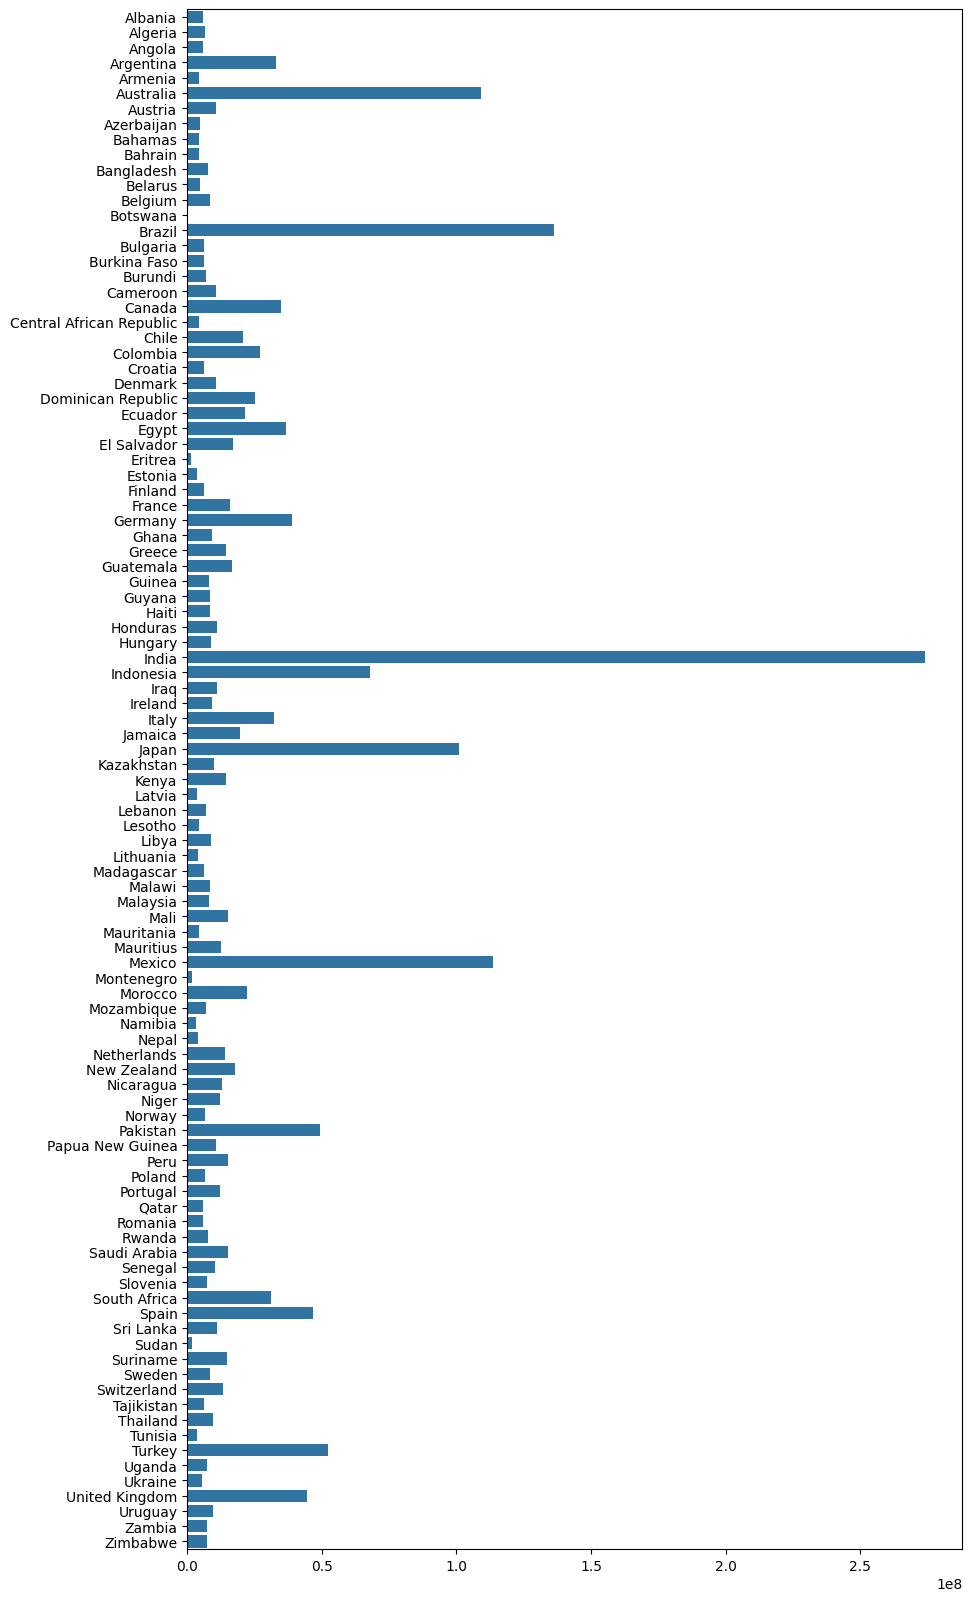

In [43]:
plt.figure(figsize=(10,20))
sns.barplot(x=yeild_per_country, y=country)

<Axes: xlabel='count', ylabel='Item'>

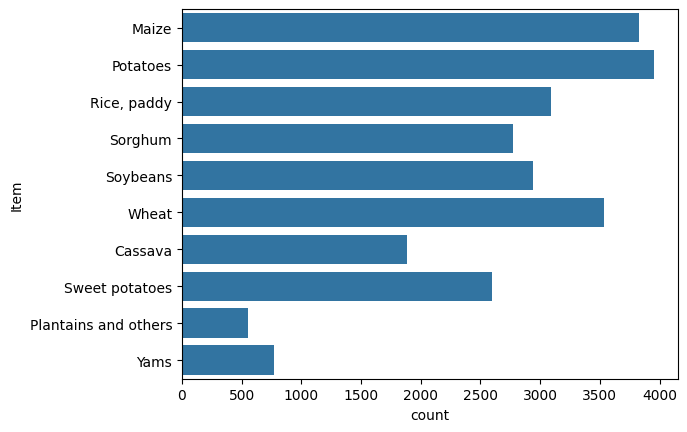

In [45]:
sns.countplot(y = df['Item'])

## Yeild Vs. Item

In [47]:
crops = df['Item'].unique()
crops

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

In [48]:
crop_yield_per_item = []
for crop in crops:
    crop_yield_per_item.append(df[df['Item'] == crop]['hg/ha_yield'].sum())
crop_yield_per_item

[np.int64(142020761),
 np.int64(785921609),
 np.int64(127646024),
 np.int64(52906376),
 np.int64(49957039),
 np.int64(106614786),
 np.int64(275132269),
 np.int64(310269345),
 np.int64(58958974),
 np.int64(86769760)]

<Axes: >

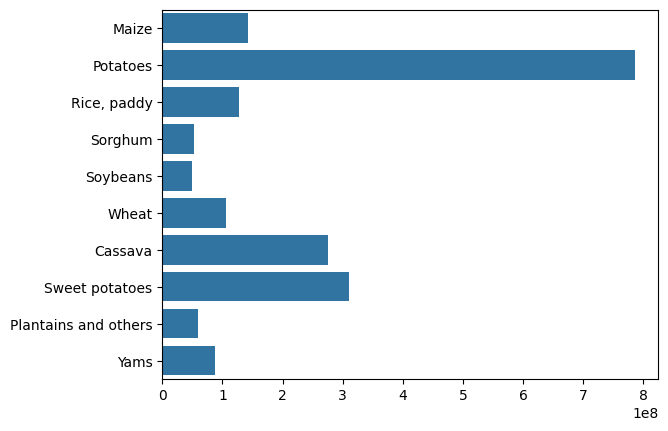

In [50]:
sns.barplot(y= crops, x=crop_yield_per_item)

## Train Test Split

In [73]:
col = ['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
df.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [74]:
x=df.drop('hg/ha_yield', axis=1)
y=df['hg/ha_yield']

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((20745, 6), (5187, 6))

### Now we Have to convert the area and Item which are in string type which is categorical Values into Numerical value for fast and possible computation

### And After that the Most Important part will be to standarize those data or Scaling in other words

### we will be using one-hot encoder to convert the string label into binary metrix which will make our computaion fast but but but
### if we try to first standard scale all the data points and then try for data encoding it will not only consume our time but also give proble while taing the input from the user i.e user will give us the input in regular format and we have to convert them all into our scale then predict the result 

In [77]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [78]:
ohe = OneHotEncoder(drop ='first')
scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('oneHotEncoder' , ohe, [4,5]),
        ('standardization' , scaler, [0,1,2,3])
    ],
remainder = 'passthrough'
)

In [79]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('oneHotEncoder', OneHotEncoder(drop='first'),
                                 [4, 5]),
                                ('standardization', StandardScaler(),
                                 [0, 1, 2, 3])])

In [83]:
x_train_dummy = preprocessor.fit_transform(x_train)
x_test_dummy = preprocessor.transform(x_test)


x_train_dummy

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 122877 stored elements and shape (20745, 113)>

In [88]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [90]:
models = {
    'lr': LinearRegression(),
    'lss': Lasso(),
    'rg': Ridge(),
    'knr': KNeighborsRegressor(),
    'dtr': DecisionTreeRegressor()
}
    


for name, model in models.items():
    model.fit(x_train_dummy, y_train)
    y_pred = model.predict(x_test_dummy)
    print(f'{name} : {mean_absolute_error(y_test, y_pred)} Score {model.score(x_test_dummy, y_test)*100}')

lr : 29920.775035487135 Score 74.86566085945691


C:\Users\Sharma's\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43166910886.83203, tolerance: 14819338848.544127
  model = cd_fast.sparse_enet_coordinate_descent(


lss : 29907.604370717865 Score 74.85842229351424
rg : 29875.50798314633 Score 74.85420121121847
knr : 4868.653518411414 Score 98.23106927202787
dtr : 4182.587044534413 Score 97.6991025702689


## How to determine which Model to choose among so many options

### 1. We Choose the model with Higest Score and lowest mean squared error
### 2. So we choose the best option i.e Decision Tree ( even it Does'nt require standarization and one Hot Encoder)

In [93]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_dummy, y_train)
dtr.predict(x_test_dummy)  # Yeilds the predicted values per country

array([160124.,  15838.,  72614., ...,  52692.,   9621., 132600.])

### Predictive System

In [95]:
def prediction():
    pass